In [2]:

import pandas as pd 
import numpy as np 
from utils import * 
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from src.classifier import Classifier
import seaborn as sns 
import matplotlib.pyplot as plt
import glob
import os
import dataframe_image as dfi
import warnings
warnings.simplefilter('ignore')

%load_ext autoreload
%autoreload 2

confusion_matrix_map = {'tp':'true positive', 'fp':'false positive', 'tn':'true negative', 'fn':'false negative'}

In [20]:
model_name = 'esm_650m_gap_test'

test_results_df = pd.read_csv('../data/results/dataset_test_predict.csv', index_col=0).drop(columns=['genome_id', 'label', 'seq'])
test_results_df = test_results_df.rename(columns={col:col.replace(model_name, 'model') for col in test_results_df.columns})
test_results_df = test_results_df.merge(pd.read_csv('../data/dataset_test.csv', index_col=0), left_index=True, right_index=True)
# test_results_df['original_cluster_label'] = pd.read_csv('../data/dataset_dereplicated_cluster.csv', index_col=0).cluster_label

train_results_df = pd.read_csv('../data/results/dataset_train_predict.csv', index_col=0).drop(columns=['genome_id', 'label', 'seq'])
train_results_df = train_results_df.rename(columns={col:col.replace(model_name, 'model') for col in train_results_df.columns})
train_results_df = train_results_df.merge(pd.read_csv('../data/dataset_train.csv', index_col=0), left_index=True, right_index=True)

In [21]:
test_results_df[test_results_df.cluster_label == 50064]
train_results_df[train_results_df.cluster_label == 50064]

,model_label,model_output_0,model_output_1,model_confusion_matrix,antifam_name,antifam_id,product,ncbi_taxonomy_id,organism,seq,...,translation_table,codon_start,evidence_type,evidence_category,evidence_details,evidence_source,used_pgap,copy_number,genome_id,cluster_label
id,,,,,,,,,,,,,,,,,,,,,
WP_021287880.1,0,0.679963,0.320037,fn,none,none,hypothetical protein,0.0,none,MQPKGFGSYYFSLAAIQAHASEQKLIAMFSSASTLDGKPLTIKITS...,...,11.0,1.0,similar to AA sequence,COORDINATES,WP_008335333.1,RefSeq,True,1.0,GCF_000445475.1,50064
WP_008335333.1,0,0.869821,0.130179,fn,none,none,hypothetical protein,0.0,none,MQPKGFGKNYFSLAAIQAHVSQQKIVAMCASASTLSGKPLTIKIAS...,...,11.0,1.0,similar to AA sequence,COORDINATES,WP_008335333.1,RefSeq,True,1.0,GCF_000242915.1,50064


In [28]:
train_results_df[train_results_df.model_confusion_matrix == 'fn']
recall(test_results_df)

np.float64(0.9975871313672923)

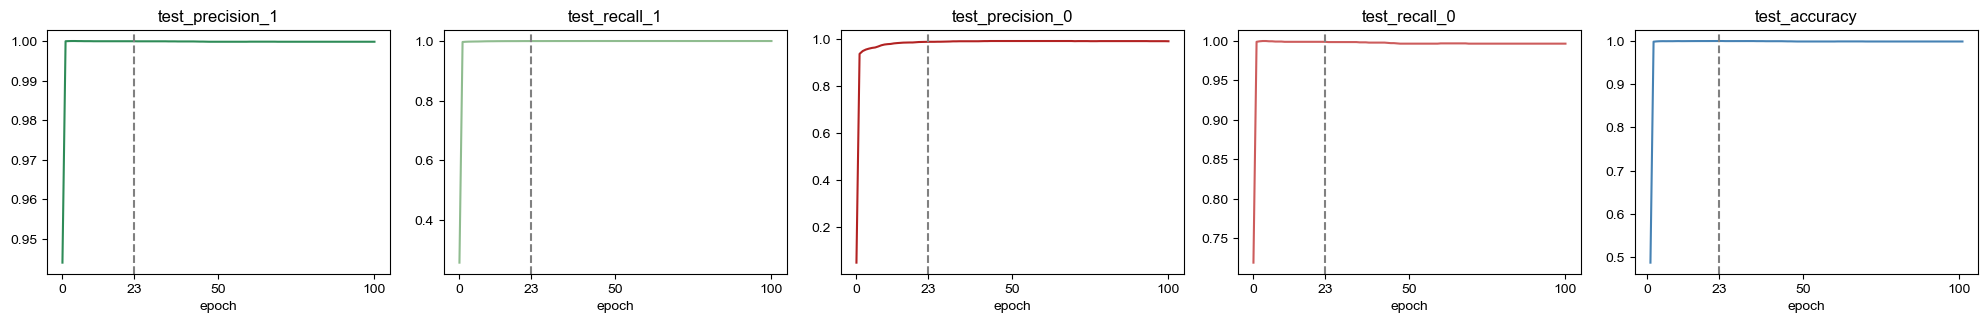

In [29]:
model = Classifier.load('../models/esm_650m_gap_test.pkl')

def figure_1(model:Classifier, path:str=None, metrics:list=['test_precision_1', 'test_recall_1', 'test_precision_0', 'test_recall_0', 'test_accuracy']):
    
    colors = dict()
    colors['test_precision_1'] = 'seagreen'
    colors['test_recall_1'] = 'darkseagreen'
    colors['test_precision_0'] = 'firebrick'
    colors['test_recall_0'] = 'indianred'
    colors['test_accuracy'] = 'steelblue'

    fig, axes = plt.subplots(ncols=len(metrics), figsize=(4 * len(metrics), 3))
    fig.tight_layout()
    
    for ax, metric in zip(axes, metrics):
        ax.set_title(metric)
        ax = sns.lineplot(x=np.arange(len(model.metrics[metric])), y=model.metrics[metric], label=metric, color=colors[metric], ax=ax, legend=False)
        ax.axvline(x=model.best_epoch, color='gray', linestyle='--')

        xticks = sorted(list(range(0, model.epochs + 1, 50)) + [model.best_epoch])
        ax.set_xticks(xticks, labels=xticks)
        ax.set_xlabel('epoch')
    
    plt.show()

figure_1(model)

In [ ]:

# def table_1(path:str='../data/figures/results-campylobacterota-table_1.png'):

#     model_names = [os.path.basename(path).replace('.pkl', '') for path in glob.glob('../models/*')]

#     results = Results(test_genome_ids, load_ref=True, load_labels=True)
#     results.load_predict(f'{results_dir}/campylobacterota_dataset_test_predict.csv', model_name=None)
#     df = results.to_df()
#     df = df.dropna()
#     df['label'] = [0 if (label == 'spurious') else 1 for label in df.label]
    
#     table_df = list()
#     for model_name in model_names:
#         row = dict()
#         row['feature type'] = re.search('(esm_650m_gap|pt5_3b_gap|esm_3b_gap)', model_name).group(1) 
#         row['model_name'] = model_name
#         row.update(df[f'{model_name}_confusion_matrix'].replace(confusion_matrix_map).value_counts().to_dict())
#         row['accuracy'] = np.round(balanced_accuracy_score(df.label, df[f'{model_name}_label']), 4)
#         table_df.append(row)
#     table_df = pd.DataFrame(table_df).set_index('model_name')
#     table_df = table_df.sort_values('false positive')

#     dfi.export(table_df, path, table_conversion='matplotlib')
#     return table_df

# table_1()


,feature type,true positive,true negative,false negative,false positive,accuracy
model_name,,,,,,
campylobacterota_esm_650m_gap_v201,esm_650m_gap,12554,56,2,1,0.9911
campylobacterota_esm_650m_gap_v202,esm_650m_gap,12531,56,25,1,0.9902
campylobacterota_esm_650m_gap_v101,esm_650m_gap,12550,56,6,1,0.9910
campylobacterota_esm_650m_gap_v301,esm_650m_gap,12550,55,6,2,0.9822


In [ ]:
def figure_2(results):

    pass 

In [91]:
results.to_df().value_counts('genome_id')

genome_id
GCF_000183725.1    1782
GCF_016937535.1    1482
GCF_900637325.1    1452
GCF_000242915.1    1310
GCF_003546685.2    1214
                   ... 
GCF_002139935.1     138
GCF_000162575.1     129
GCF_900197775.1     118
GCF_003355515.1     108
GCF_013372245.1      78
Name: count, Length: 196, dtype: int64

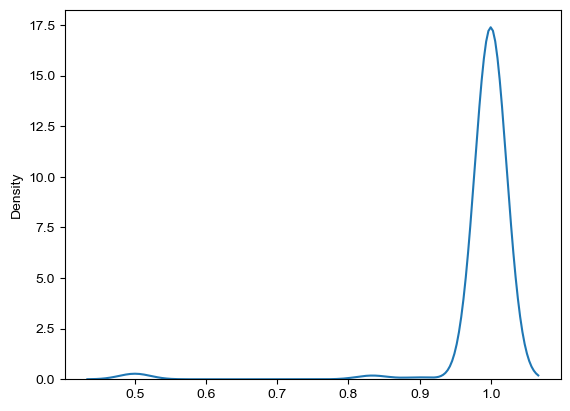

In [ ]:
# Want to get a rough estimate of the performance per genome. There are 40 genomes in the test dataset. 
# How does it correlate with genome characteristics?
def figure_3(results:Results, genome_metadata_df:pd.DataFrame):
    df = results.to_df()
    df = df.merge(genome_metadata_df, right_index=True, left_on='genome_id', validate='many_to_one')
    df['label'] = [0 if (label == 'spurious') else 1 for label in df.label]

    fig = plt.figure()
    ax = fig.add_subplot()

    ax_df = pd.DataFrame(index=df.groupby('genome_id').genome_id)
    ax_df = ax_df.groupby('genome_id').apply(lambda df : balanced_accuracy_score(df.label, df.model_label))
    sns.kdeplot(data=ax_df, ax=ax)

figure_3(results, genome_metadata_df)